# IPL Data Analysis 200-2025

## Import Libraries and Load Datasets

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')

In [2]:
deliveries = pd.read_csv('Dataset/ball_by_ball_data.csv')
matches = pd.read_csv('Dataset/ipl_matches_data.csv')
players = pd.read_csv('Dataset/players_data_updated.csv', encoding = "latin1")

In [3]:
deliveries.head()

,season_id,match_id,batter,bowler,non_striker,team_batting,team_bowling,over_number,ball_number,batter_runs,...,is_bye,is_penalty,wide_ball_runs,no_ball_runs,leg_bye_runs,bye_runs,penalty_runs,wicket_kind,is_super_over,innings
0,2008,335982,SC Ganguly,P Kumar,BB McCullum,Kolkata Knight Riders,Royal Challengers Bangalore,0,0,0,...,False,False,0,0,1,0,0,NaN,False,1
1,2008,335982,BB McCullum,P Kumar,SC Ganguly,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,0,...,False,False,0,0,0,0,0,NaN,False,1
2,2008,335982,BB McCullum,P Kumar,SC Ganguly,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,0,...,False,False,1,0,0,0,0,NaN,False,1
3,2008,335982,BB McCullum,P Kumar,SC Ganguly,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,0,...,False,False,0,0,0,0,0,NaN,False,1
4,2008,335982,BB McCullum,P Kumar,SC Ganguly,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,0,...,False,False,0,0,0,0,0,NaN,False,1


In [4]:
matches.head()

,match_id,season_id,balls_per_over,city,match_date,event_name,match_number,gender,match_type,format,...,toss_winner,team1,team2,toss_decision,match_winner,win_by_runs,win_by_wickets,player_of_match,result,stage
0,335982,2008,6,Bangalore,18-04-2008,Indian Premier League,1.0,male,T20,T20,...,Royal Challengers Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,field,Kolkata Knight Riders,140.0,NaN,46.0,win,NaN
1,335983,2008,6,Chandigarh,19-04-2008,Indian Premier League,2.0,male,T20,T20,...,Chennai Super Kings,Punjab Kings,Chennai Super Kings,bat,Chennai Super Kings,33.0,NaN,11943.0,win,NaN
2,335984,2008,6,Delhi,19-04-2008,Indian Premier League,3.0,male,T20,T20,...,Rajasthan Royals,Delhi Capitals,Rajasthan Royals,bat,Delhi Capitals,NaN,9.0,11982.0,win,NaN
3,335985,2008,6,Mumbai,20-04-2008,Indian Premier League,5.0,male,T20,T20,...,Mumbai Indians,Mumbai Indians,Royal Challengers Bangalore,bat,Royal Challengers Bangalore,NaN,5.0,11935.0,win,NaN
4,335986,2008,6,Kolkata,20-04-2008,Indian Premier League,4.0,male,T20,T20,...,Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,bat,Kolkata Knight Riders,NaN,5.0,11922.0,win,NaN


In [5]:
players.head()

,player_id,player_name,bat_style,bowl_style,field_pos,player_full_name,player_name2,player_image
0,6730,Mohsin Khan,Left hand Bat,Left arm Medium fast,NaN,Mohsin Khan,Mohsin Khan,NaN
1,22,Rashid Khan,Right hand Bat,Legbreak Googly,,Rashid Khan Arman,Rashid Khan,https://www.espncricinfo.com/cricketers/rashid...
2,590,K Rabada,Left hand Bat,Right arm Fast,,Kagiso Rabada,Kagiso Rabada,https://ipl-stats-sports-mechanic.s3.ap-south-...
3,1424,SN Khan,Right hand Bat,Legbreak,,Sarfaraz Naushad Khan,Sarfaraz Naushad,NaN
4,963,MN Samuels,Right hand Bat,Right arm Offbreak,,Marlon Nathaniel Samuels,Marlon Nathaniel,NaN


## Basic EDA

In [6]:
print("Ball-by-ball Data Shape:", deliveries.shape)

Ball-by-ball Data Shape: (278205, 30)


In [7]:
print("Matches Data Shape:", matches.shape)

Matches Data Shape: (1169, 24)


In [8]:
print("Players Data Shape:", players.shape)

Players Data Shape: (772, 8)


In [9]:
deliveries.columns

Index(['season_id', 'match_id', 'batter', 'bowler', 'non_striker',
       'team_batting', 'team_bowling', 'over_number', 'ball_number',
       'batter_runs', 'extras', 'total_runs', 'batsman_type', 'bowler_type',
       'player_out', 'fielders_involved', 'is_wicket', 'is_wide_ball',
       'is_no_ball', 'is_leg_bye', 'is_bye', 'is_penalty', 'wide_ball_runs',
       'no_ball_runs', 'leg_bye_runs', 'bye_runs', 'penalty_runs',
       'wicket_kind', 'is_super_over', 'innings'],
      dtype='object')

In [10]:
matches.columns

Index(['match_id', 'season_id', 'balls_per_over', 'city', 'match_date',
       'event_name', 'match_number', 'gender', 'match_type', 'format', 'overs',
       'season', 'team_type', 'venue', 'toss_winner', 'team1', 'team2',
       'toss_decision', 'match_winner', 'win_by_runs', 'win_by_wickets',
       'player_of_match', 'result', 'stage'],
      dtype='object')

In [11]:
players.columns

Index(['player_id', 'player_name', 'bat_style', 'bowl_style', 'field_pos',
       'player_full_name', 'player_name2', 'player_image'],
      dtype='object')

In [12]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278205 entries, 0 to 278204
Data columns (total 30 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   season_id          278205 non-null  int64 
 1   match_id           278205 non-null  int64 
 2   batter             278205 non-null  object
 3   bowler             278205 non-null  object
 4   non_striker        278205 non-null  object
 5   team_batting       278205 non-null  object
 6   team_bowling       278205 non-null  object
 7   over_number        278205 non-null  int64 
 8   ball_number        278205 non-null  int64 
 9   batter_runs        278205 non-null  int64 
 10  extras             278205 non-null  int64 
 11  total_runs         278205 non-null  int64 
 12  batsman_type       278205 non-null  object
 13  bowler_type        278205 non-null  object
 14  player_out         13823 non-null   object
 15  fielders_involved  13823 non-null   object
 16  is_wicket          2

In [13]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1169 entries, 0 to 1168
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   match_id         1169 non-null   int64  
 1   season_id        1169 non-null   int64  
 2   balls_per_over   1169 non-null   int64  
 3   city             1118 non-null   object 
 4   match_date       1169 non-null   object 
 5   event_name       1169 non-null   object 
 6   match_number     1099 non-null   float64
 7   gender           1169 non-null   object 
 8   match_type       1169 non-null   object 
 9   format           1169 non-null   object 
 10  overs            1169 non-null   int64  
 11  season           1169 non-null   int64  
 12  team_type        1169 non-null   object 
 13  venue            1169 non-null   object 
 14  toss_winner      1168 non-null   object 
 15  team1            1169 non-null   object 
 16  team2            1169 non-null   object 
 17  toss_decision 

In [14]:
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 772 entries, 0 to 771
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   player_id         772 non-null    int64 
 1   player_name       772 non-null    object
 2   bat_style         772 non-null    object
 3   bowl_style        759 non-null    object
 4   field_pos         707 non-null    object
 5   player_full_name  772 non-null    object
 6   player_name2      772 non-null    object
 7   player_image      134 non-null    object
dtypes: int64(1), object(7)
memory usage: 48.4+ KB


In [15]:
deliveries.describe()

,season_id,match_id,over_number,ball_number,batter_runs,extras,total_runs,wide_ball_runs,no_ball_runs,leg_bye_runs,bye_runs,penalty_runs,innings
count,278205.000000,2.782050e+05,278205.000000,278205.000000,278205.000000,278205.000000,278205.00000,278205.000000,278205.000000,278205.000000,278205.000000,278205.000000,278205.000000
mean,2016.710178,9.422687e+05,9.193839,2.626434,1.277378,0.067971,1.34535,0.039122,0.004306,0.019816,0.004691,0.000036,1.482914
std,5.248572,3.817198e+05,5.681511,1.816767,1.651107,0.343033,1.63762,0.255394,0.069320,0.191231,0.114116,0.013406,0.502571
min,2008.000000,3.359820e+05,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2012.000000,5.483530e+05,4.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2017.000000,1.082601e+06,9.000000,3.000000,1.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,2022.000000,1.304049e+06,14.000000,4.000000,1.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,2025.000000,1.485779e+06,19.000000,10.000000,6.000000,7.000000,7.00000,5.000000,5.000000,5.000000,4.000000,5.000000,6.000000


In [16]:
matches.describe()

,match_id,season_id,balls_per_over,match_number,overs,season,win_by_runs,win_by_wickets,player_of_match
count,1.169000e+03,1169.000000,1169.0,1099.000000,1169.0,1169.000000,531.000000,615.000000,1161.000000
mean,9.409343e+05,2016.687767,6.0,31.705187,20.0,2016.687767,30.295669,6.200000,3274.304048
std,3.820777e+05,5.253100,0.0,18.518304,0.0,5.253100,26.866707,1.852193,5857.156934
min,3.359820e+05,2008.000000,6.0,1.000000,20.0,2008.000000,1.000000,1.000000,1.000000
25%,5.483520e+05,2012.000000,6.0,16.000000,20.0,2012.000000,11.000000,5.000000,47.000000
50%,1.082598e+06,2017.000000,6.0,31.000000,20.0,2017.000000,22.000000,6.000000,318.000000
75%,1.304047e+06,2022.000000,6.0,47.000000,20.0,2022.000000,41.000000,7.500000,4047.000000
max,1.589258e+06,2025.000000,6.0,72.000000,20.0,2025.000000,146.000000,10.000000,42566.000000


In [17]:
print("\Missing Values (Ball Data):\n", deliveries.isnull().sum())

\Missing Values (Ball Data):
 season_id                 0
match_id                  0
batter                    0
bowler                    0
non_striker               0
team_batting              0
team_bowling              0
over_number               0
ball_number               0
batter_runs               0
extras                    0
total_runs                0
batsman_type              0
bowler_type               0
player_out           264382
fielders_involved    264382
is_wicket                 0
is_wide_ball              0
is_no_ball                0
is_leg_bye                0
is_bye                    0
is_penalty                0
wide_ball_runs            0
no_ball_runs              0
leg_bye_runs              0
bye_runs                  0
penalty_runs              0
wicket_kind          264382
is_super_over             0
innings                   0
dtype: int64


In [18]:
print("\Missing Values (Matches Data):\n", matches.isnull().sum())

\Missing Values (Matches Data):
 match_id              0
season_id             0
balls_per_over        0
city                 51
match_date            0
event_name            0
match_number         70
gender                0
match_type            0
format                0
overs                 0
season                0
team_type             0
venue                 0
toss_winner           1
team1                 0
team2                 0
toss_decision         1
match_winner          8
win_by_runs         638
win_by_wickets      554
player_of_match       8
result                0
stage              1148
dtype: int64


In [19]:
print("\Missing Values (Players Data):\n", players.isnull().sum())

\Missing Values (Players Data):
 player_id             0
player_name           0
bat_style             0
bowl_style           13
field_pos            65
player_full_name      0
player_name2          0
player_image        638
dtype: int64


## Data Cleaning

In [20]:
ball_clean = deliveries.dropna(subset= ['batter', 'bowler'])
players_clean = players.dropna()

In [21]:
# Auto-detect important columns in matches dataset
winner_col = next(col for col in matches.columns if 'win' in col.lower())
season_col = next(col for col in matches.columns if 'season' in col.lower())

In [22]:
def random_colors(no_of_colors):
    return ['#'+''.join([np.random.choice(list('0123456789ABCDEF')) for _ in range(6)]) for _ in range(no_of_colors)]

In [23]:
random_colors(6)

['#BAC6FB', '#3B4AC0', '#2674BC', '#987CC9', '#E3B9CA', '#DF13BB']

## Top 10 Run Scores (All Seasons)

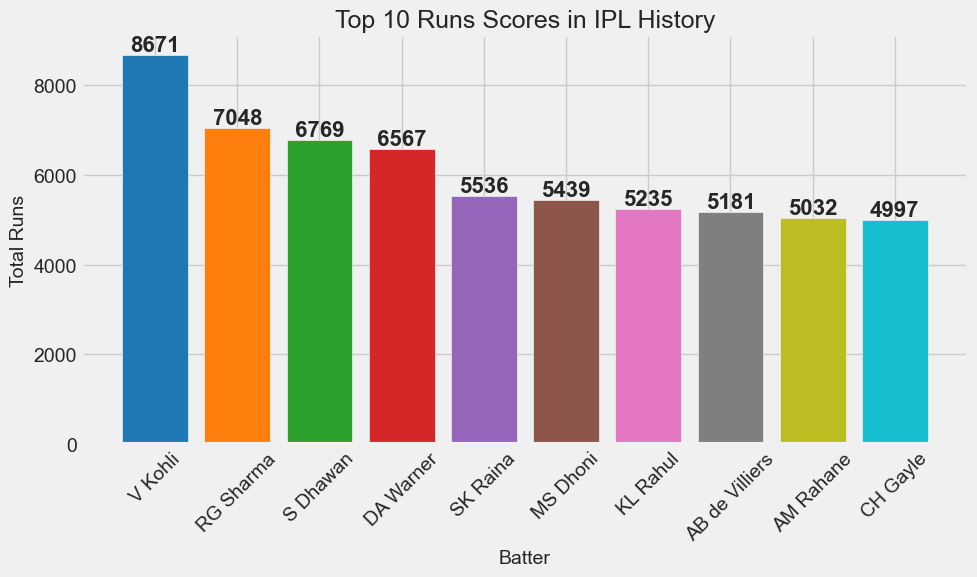

In [24]:
top_batters = (
    ball_clean.groupby("batter")["batter_runs"]
    .sum()
    .sort_values(ascending = False)
    .head(10)
)

plt.figure(figsize = (10, 6))

# Colorful bar chart
bars = plt.bar(
    top_batters.index,
    top_batters.values,
    color = plt.cm.tab10.colors # built-in colorful palette
)

plt.title("Top 10 Runs Scores in IPL History", fontsize = 18)
plt.xlabel("Batter", fontsize = 14)
plt.ylabel("Total Runs", fontsize = 14)
plt.xticks(rotation = 45)

# Data labels 
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f"{int(height)}",
        ha = "center",
        va = "bottom",
        fontsize = 16,
        fontweight = "bold"
    )

plt.tight_layout()
plt.show()

## Top 10 Wicket Takers (All Season)

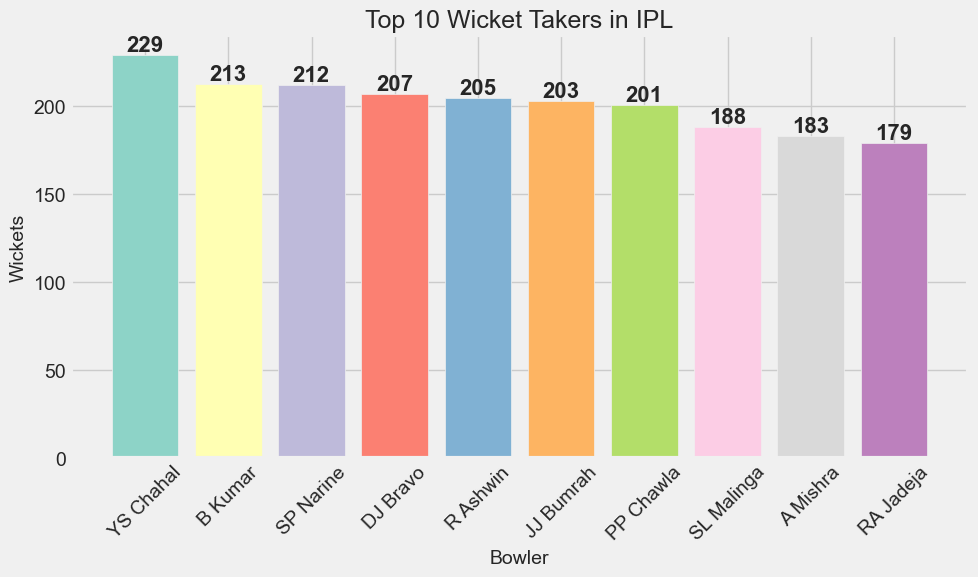

In [25]:
import matplotlib.pyplot as plt

top_bowlers = (
    ball_clean[ball_clean["is_wicket"] == 1]
    .groupby("bowler")["is_wicket"]
    .count()
    .sort_values(ascending = False)
    .head(10)
)

plt.figure(figsize = (10, 6))

# Colorful bars using matplotlib colormap
bars = plt.bar(
    top_bowlers.index,
    top_bowlers.values,
    color = plt.cm.Set3.colors  # colorful palette
)

plt.title("Top 10 Wicket Takers in IPL", fontsize = 18)
plt.xlabel("Bowler", fontsize = 14)
plt.ylabel("Wickets", fontsize = 14)
plt.xticks(rotation = 45)

# Data labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f"{int(height)}",
        ha = "center",
        va = "bottom",
        fontsize = 16,
        fontweight="bold"
    )

plt.tight_layout()
plt.show()

## Most Successful IPL Teams

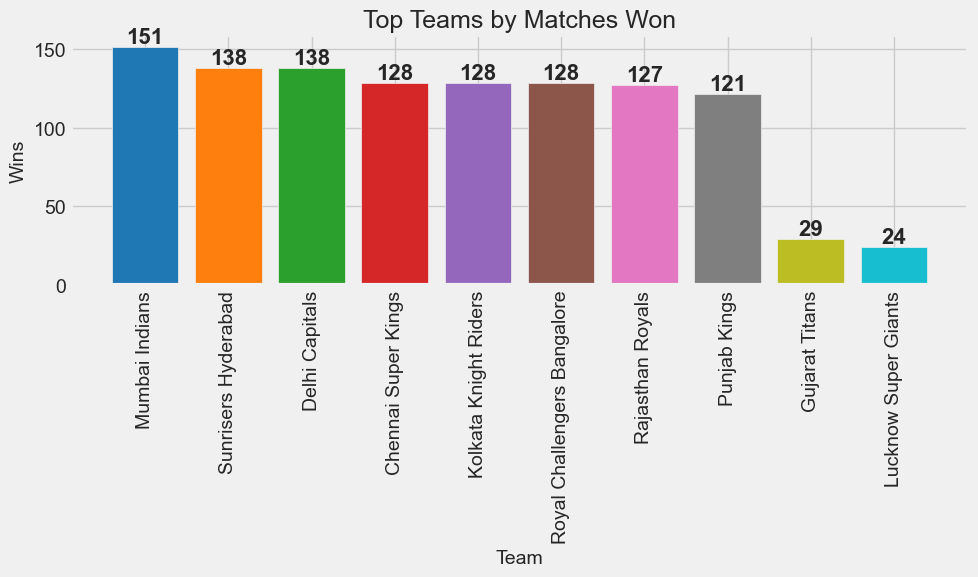

In [26]:
team_wins = matches[winner_col].value_counts().head(10)

plt.figure(figsize = (10, 6))

# Colorful bars
bars = plt.bar(
    team_wins.index,
    team_wins.values,
    color = plt.cm.tab10.colors   # vibrant colors
)

plt.title("Top Teams by Matches Won", fontsize = 18)
plt.xlabel("Team", fontsize = 14)
plt.ylabel("Wins", fontsize = 14)
plt.xticks(rotation = 90)

# Value labels
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f"{int(height)}",
        ha = "center",
        va = "bottom",
        fontsize = 16,
        fontweight = "bold"
    )

plt.tight_layout()
plt.show()

## Matches Played per Season

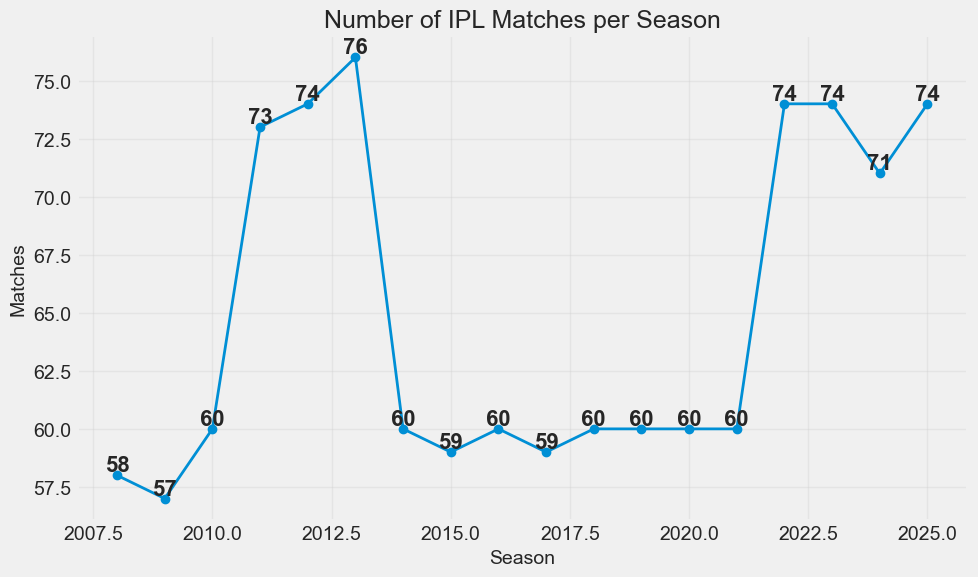

In [27]:
import matplotlib.pyplot as plt

matches_per_season = matches[season_col].value_counts().sort_index()

plt.figure(figsize=(10, 6))

# Colorful line chart
plt.plot(
    matches_per_season.index,
    matches_per_season.values,
    marker = "o",
    linewidth=2
)

plt.title("Number of IPL Matches per Season", fontsize = 18)
plt.xlabel("Season", fontsize = 14)
plt.ylabel("Matches", fontsize = 14)

# Data labels
for x, y in zip(matches_per_season.index, matches_per_season.values):
    plt.text(
        x,
        y,
        str(y),
        ha="center",
        va="bottom",
        fontsize = 16,
        fontweight = "bold"
    )

plt.grid(alpha = 0.3)
plt.tight_layout()
plt.show()

## Auto-detect Columns (Robust)

In [28]:
season_col = next(c for c in matches.columns if "season" in c.lower())
winner_col = next(c for c in matches.columns if "winner" in c.lower() or "win" in c.lower())
toss_winner_col = next(c for c in matches.columns if "toss_winner" in c.lower())
toss_decision_col = next(c for c in matches.columns if "toss_decision" in c.lower())
pom_col = next(c for c in matches.columns if "player_of_match" in c.lower())
player_name_col = next(c for c in players.columns if "name" in c.lower())

## Number of Player of the Match Awards

In [29]:
# Count Player of the Match awards

pom_counts = matches["player_of_match"].value_counts().reset_index()
pom_counts.columns = ["player_id", "pom_awards"]

In [30]:
# Merge with players dataset to get player_name

pom_players = pom_counts.merge(
    players[["player_id","player_name"]],
    on = "player_id",
    how = "left"
)

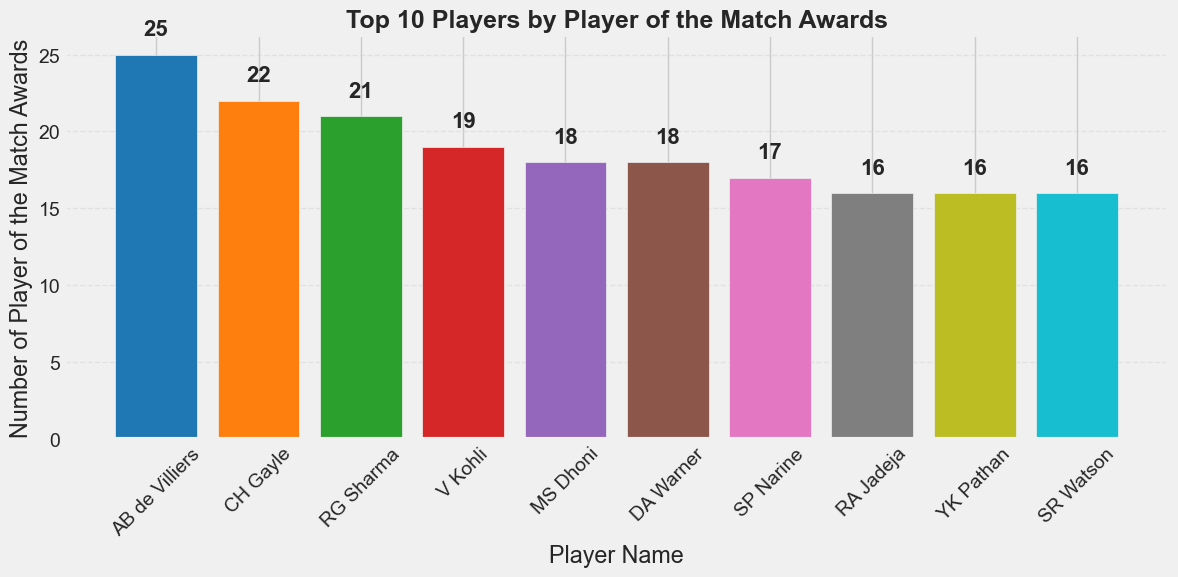

In [31]:
top_10_pom = pom_players.head(10)

# Colorful bars using colormap
colors = plt.cm.tab10(np.linspace(0, 1, len(top_10_pom)))

plt.figure(figsize = (12, 6))
bars = plt.bar(
    top_10_pom["player_name"],
    top_10_pom["pom_awards"],
    color = colors
)

# Data labels
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 1,
        int(height),
        ha = 'center',
        va = 'bottom',
        fontsize = 16,
        fontweight = 'bold'
    )

# Chart styling
plt.title("Top 10 Players by Player of the Match Awards", fontsize = 18, fontweight = 'bold')
plt.xlabel("Player Name")
plt.ylabel("Number of Player of the Match Awards")
plt.xticks(rotation = 45)
plt.grid(axis = 'y', linestyle = '--', alpha = 0.4)
plt.tight_layout()
plt.show()

## Top 10 Most Sixes by Player in IPL History

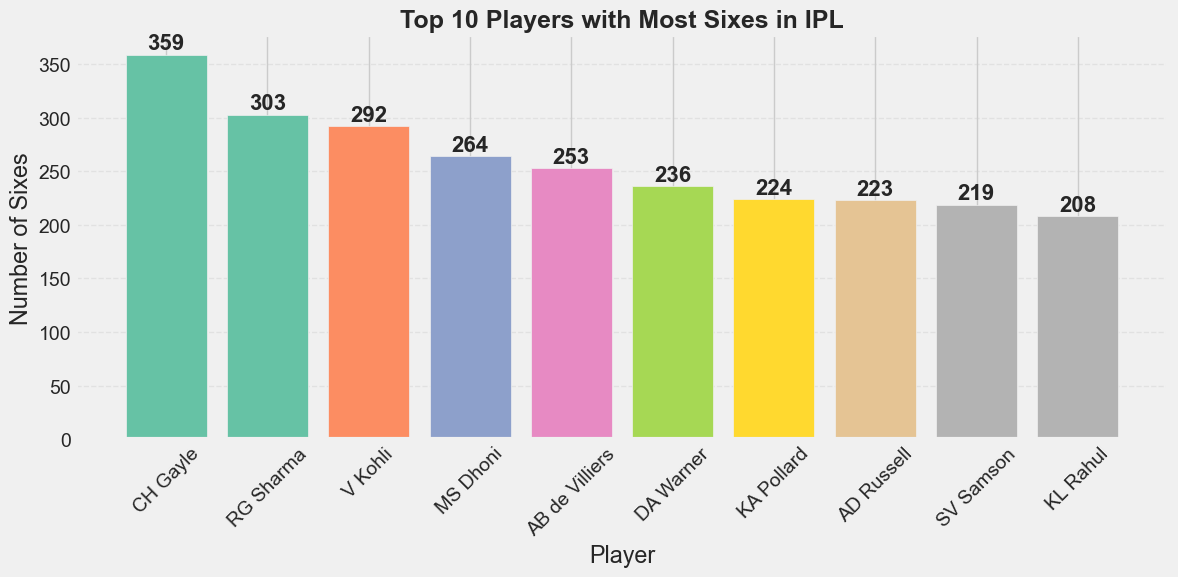

In [32]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate top 10 six hitters
sixes = deliveries[deliveries["batter_runs"] == 6]["batter"].value_counts().head(10)

# Generate colorful bars using colormap
colors = plt.cm.Set2(np.linspace(0, 1, len(sixes)))

plt.figure(figsize=(12, 6))
bars = plt.bar(sixes.index, sixes.values, color = colors)

# Add data labels
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 1,
        int(height),
        ha = "center",
        va = "bottom",
        fontsize = 16,
        fontweight = "bold"
    )

# Chart styling
plt.title("Top 10 Players with Most Sixes in IPL", fontsize = 18, fontweight = "bold")
plt.xlabel("Player")
plt.ylabel("Number of Sixes")
plt.xticks(rotation = 45)
plt.grid(axis = "y", linestyle = "--", alpha = 0.4)
plt.tight_layout()
plt.show()

## Season wise Winner & Runner Up

In [33]:
df = matches[["season", "team1", "team2", "match_winner", "stage"]]

In [34]:
finals = df[df["stage"].str.lower() == "final"].copy()

In [35]:
finals["Champion"] = finals["match_winner"]

finals["Runner_Up"] = finals.apply(
    lambda x: x["team2"] if x["Champion"] == x["team1"] else x["team1"],
    axis=1
)

In [36]:
ipl_results = (
    finals[["season", "Champion", "Runner_Up"]]
    .sort_values("season")
    .reset_index(drop=True)
)

print(ipl_results)

    season                     Champion                    Runner_Up
0     2008             Rajasthan Royals          Chennai Super Kings
1     2009          Sunrisers Hyderabad  Royal Challengers Bangalore
2     2010          Chennai Super Kings               Mumbai Indians
3     2011          Chennai Super Kings  Royal Challengers Bangalore
4     2012        Kolkata Knight Riders          Chennai Super Kings
5     2013               Mumbai Indians          Chennai Super Kings
6     2014        Kolkata Knight Riders                 Punjab Kings
7     2015               Mumbai Indians          Chennai Super Kings
8     2016          Sunrisers Hyderabad  Royal Challengers Bangalore
9     2017               Mumbai Indians       Rising Pune Supergiant
10    2018          Chennai Super Kings          Sunrisers Hyderabad
11    2019               Mumbai Indians          Chennai Super Kings
12    2020               Mumbai Indians               Delhi Capitals
13    2021          Chennai Super 

## Most Runs Scores in Each IPL Season

In [37]:
# Calculate season-wise top run scorer
season_runs = (
    deliveries.groupby(["season_id", "batter"])["batter_runs"]
    .sum()
    .reset_index()
)

top_season_runs = (
    season_runs
    .loc[season_runs.groupby("season_id")["batter_runs"].idxmax()]
    .sort_values("season_id")
    .reset_index(drop = True)
)

top_season_runs.columns = ["Season", "Batsman", "Runs"]

top_season_runs

,Season,Batsman,Runs
0,2008,SE Marsh,616
1,2009,ML Hayden,572
2,2010,SR Tendulkar,618
3,2011,CH Gayle,608
4,2012,CH Gayle,733
5,2013,MEK Hussey,733
6,2014,RV Uthappa,660
7,2015,DA Warner,562
8,2016,V Kohli,973
9,2017,DA Warner,641


## Number of Hightest Runs Scored in IPL History

In [38]:
top_scorer_count = (
    top_season_runs
    .groupby("Batsman")
    .size()
    .reset_index(name="Number_of_Seasons_as_Top_Scorer")
    .sort_values("Number_of_Seasons_as_Top_Scorer", ascending = False)
)

top_scorer_count

,Batsman,Number_of_Seasons_as_Top_Scorer
2,DA Warner,3
1,CH Gayle,2
13,V Kohli,2
0,B Sai Sudharsan,1
4,KL Rahul,1
3,JC Buttler,1
5,KS Williamson,1
6,MEK Hussey,1
8,RD Gaikwad,1
7,ML Hayden,1


## Most Wickets by bowler in Each IPL Season

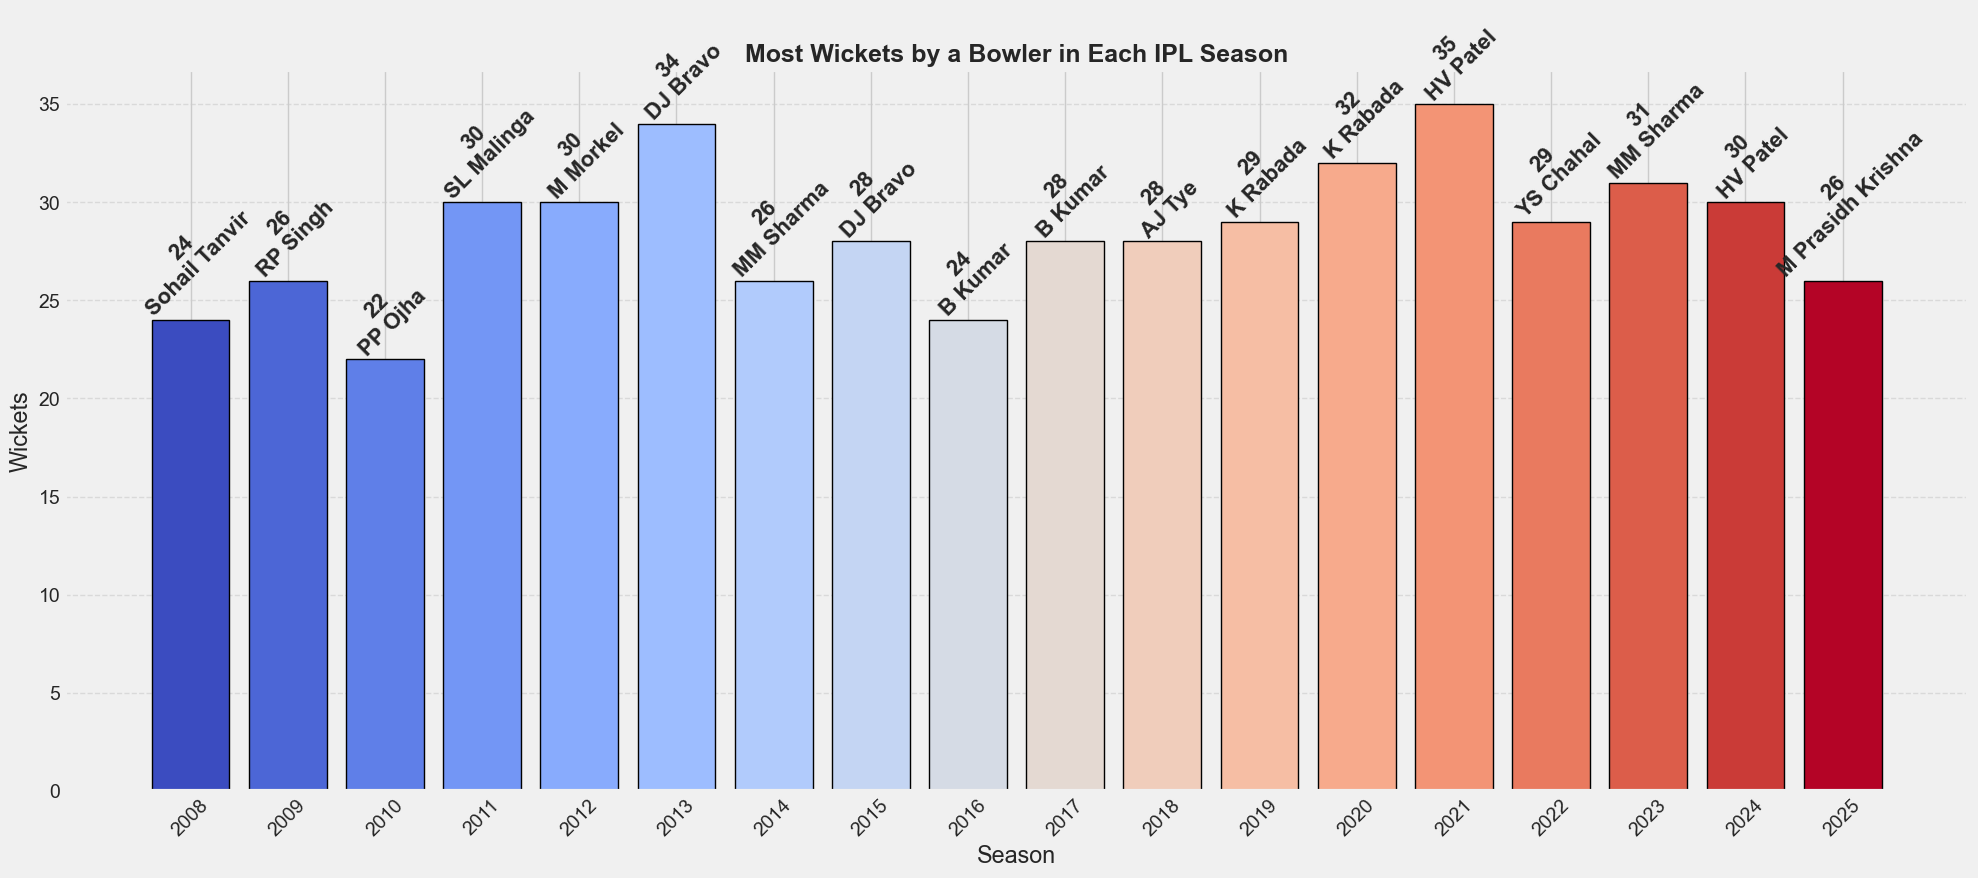

In [39]:
season_wickets = (
    deliveries[deliveries["is_wicket"] == 1]
    .groupby(["season_id", "bowler"])
    .size()
    .reset_index(name = "wickets")
)

# Top wicket-taker per season
top_season_wickets = (
    season_wickets
    .loc[season_wickets.groupby("season_id")["wickets"].idxmax()]
    .sort_values("season_id")
    .reset_index(drop = True)
)

# Create colorful chart
plt.figure(figsize = (20, 9))

colors = plt.cm.coolwarm(np.linspace(0, 1, len(top_season_wickets)))

bars = plt.bar(
    top_season_wickets["season_id"].astype(str),
    top_season_wickets["wickets"],
    color = colors,
    edgecolor = "black",
    linewidth = 1
)

plt.title("Most Wickets by a Bowler in Each IPL Season", fontsize = 18, fontweight = "bold")
plt.xlabel("Season")
plt.ylabel("Wickets")

# Grid for readability
plt.grid(axis = "y", linestyle = "--", alpha = 0.6)

# Data labels with bowler name
for bar, wickets, bowler in zip(
    bars,
    top_season_wickets["wickets"],
    top_season_wickets["bowler"]
):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f"{wickets}\n{bowler}",
        ha = "center",
        va = "bottom",
        fontsize = 16,
        fontweight = "bold",
        rotation = 45
    )

plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

## Number of Highest Wicket Taker in IPL History

In [40]:
top_wicket_season_count = (
    top_season_wickets
    .groupby("bowler")
    .size()
    .reset_index(name = "Number_of_seasons_as_Top_Wicket_Taker")
    .sort_values("Number_of_seasons_as_Top_Wicket_Taker", ascending = False)
)

top_wicket_season_count

,bowler,Number_of_seasons_as_Top_Wicket_Taker
1,B Kumar,2
3,HV Patel,2
2,DJ Bravo,2
4,K Rabada,2
7,MM Sharma,2
0,AJ Tye,1
5,M Morkel,1
6,M Prasidh Krishna,1
8,PP Ojha,1
9,RP Singh,1


## Top 10 Most Fours by Player in IPL History

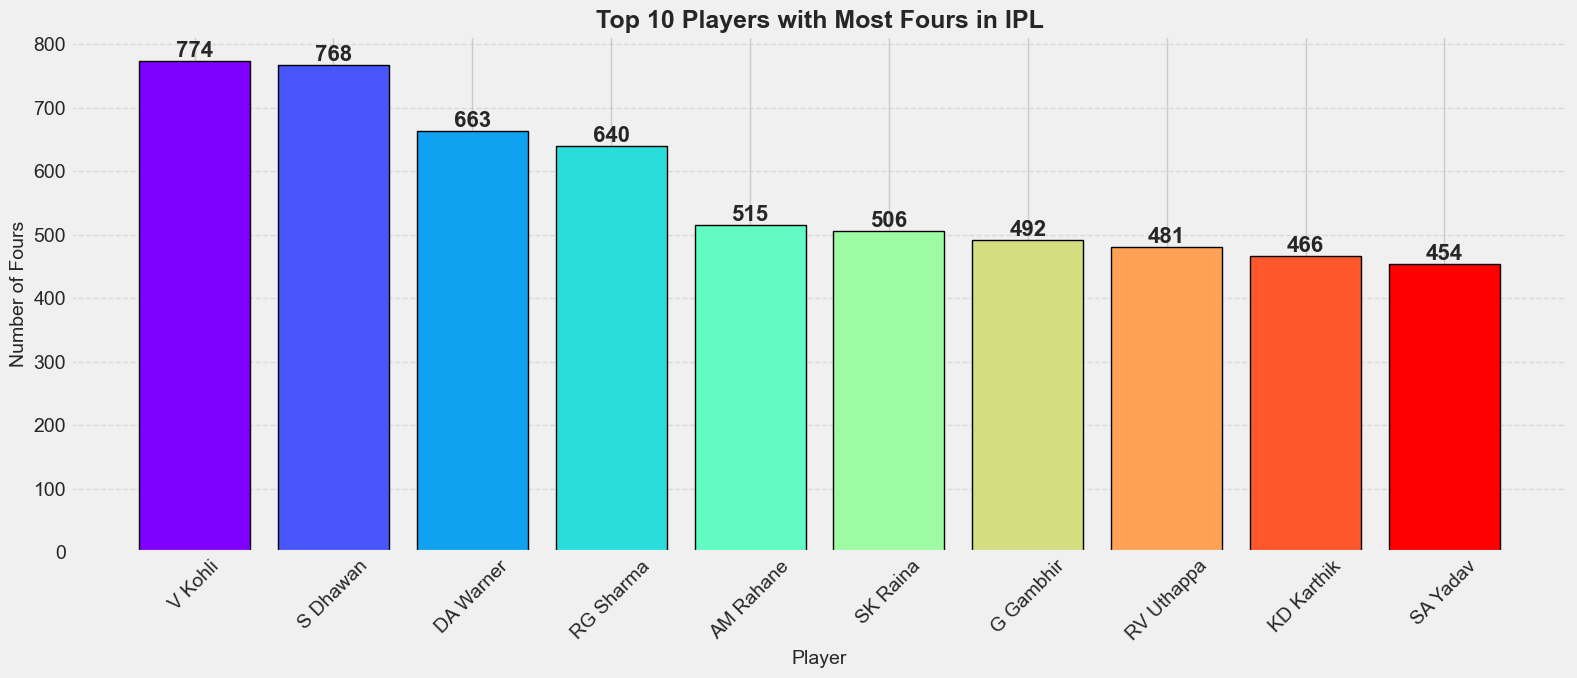

In [41]:
fours = (
    deliveries[deliveries["batter_runs"] == 4]["batter"]
    .value_counts()
    .head(10)
)

plt.figure(figsize = (16, 7))

colors = plt.cm.rainbow(np.linspace(0, 1, len(fours)))

bars = plt.bar(
    fours.index,
    fours.values,
    color = colors,
    edgecolor = "black",
    linewidth = 1
)

plt.title("Top 10 Players with Most Fours in IPL", fontsize = 18, fontweight = "bold")
plt.xlabel("Player", fontsize = 14)
plt.ylabel("Number of Fours", fontsize = 14)

plt.grid(axis = "y", linestyle = "--", alpha = 0.6)

for bar, value in zip(bars, fours.values):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        value,
        ha = "center",
        va = "bottom",
        fontsize = 16,
        fontweight = "bold"
    )

plt.xticks(rotation = 45, fontsize = 14)
plt.tight_layout()
plt.show()

## Most Sixes by Player in Each IPL Season

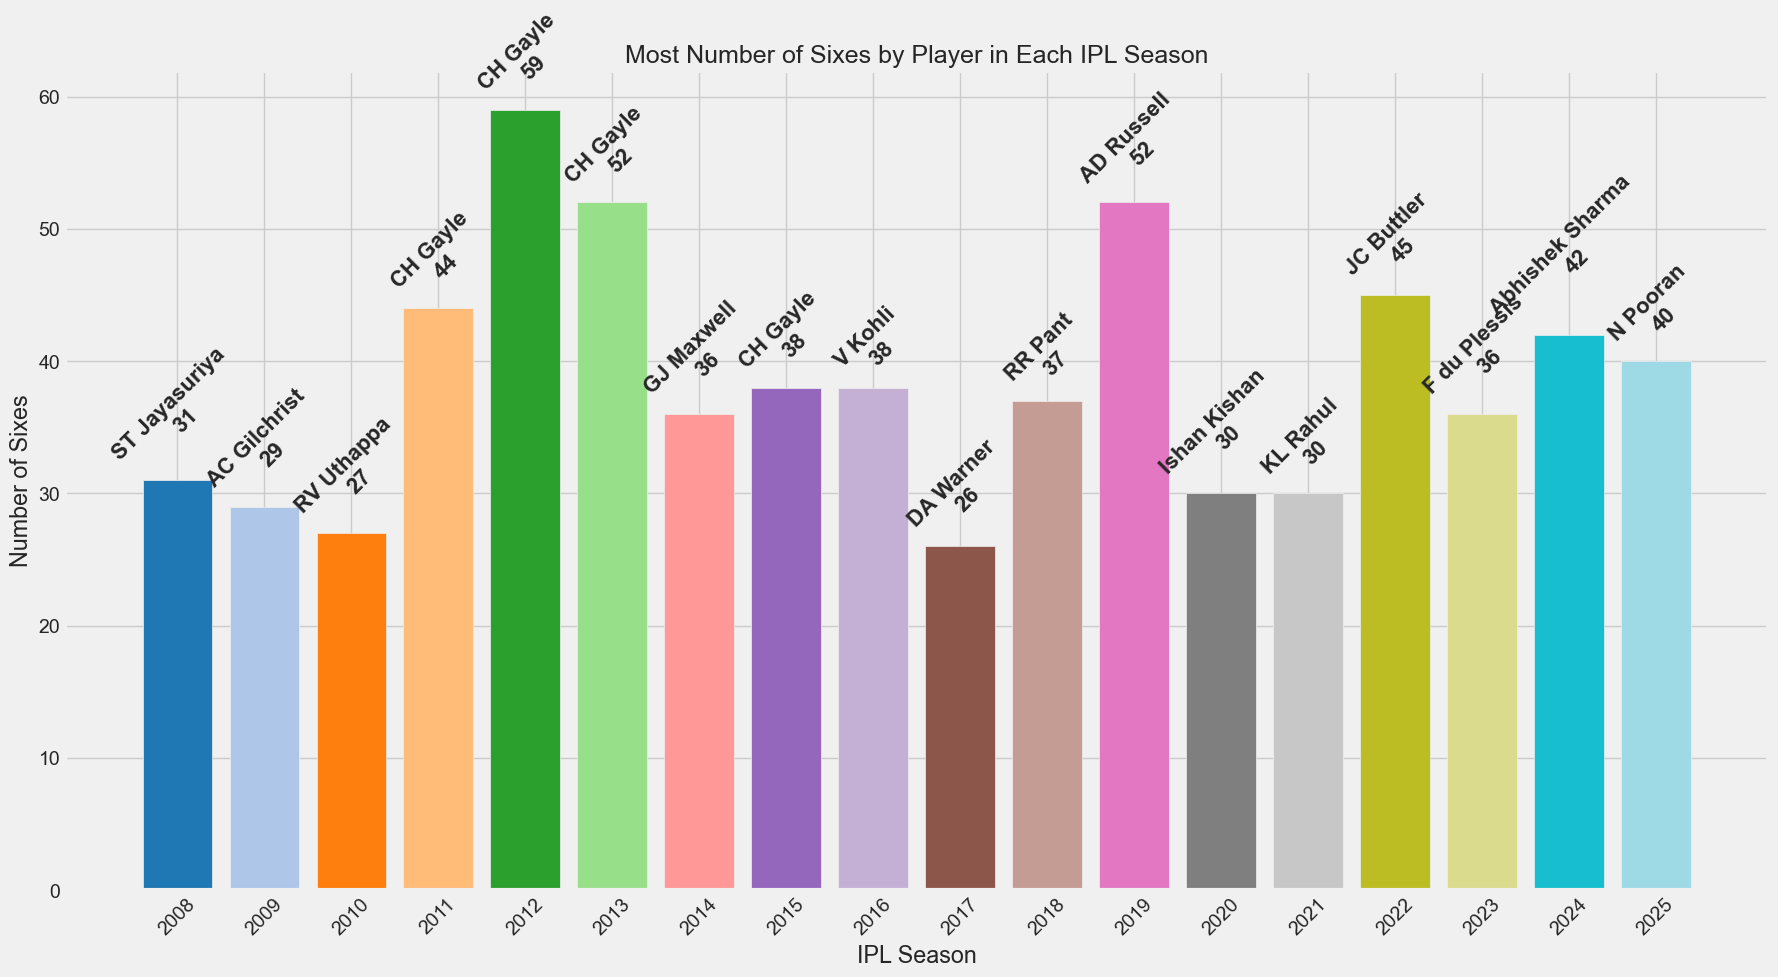

In [42]:
season_sixes = (
    deliveries[deliveries["batter_runs"] == 6]
    .groupby(["season_id", "batter"])
    .size()
    .reset_index(name = "sixes")
)

# Get top six-hitter of each season
top_season_sixes = season_sixes.loc[
    season_sixes.groupby("season_id")["sixes"].idxmax()
].sort_values("season_id")

# Plot
plt.figure(figsize = (18,10))
colors = plt.cm.tab20(np.linspace(0, 1, len(top_season_sixes)))

bars = plt.bar(
    top_season_sixes["season_id"].astype(str),
    top_season_sixes["sixes"],
    color = colors
)

plt.title("Most Number of Sixes by Player in Each IPL Season", fontsize = 18)
plt.xlabel("IPL Season")
plt.ylabel("Number of Sixes")
plt.xticks(rotation = 45)

# Data labels
for bar, batter, sixes in zip(
    bars,
    top_season_sixes["batter"],
    top_season_sixes["sixes"]
):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f"{batter}\n{sixes}",
        ha = "center",
        va = "bottom",
        fontsize = 16,
        fontweight = "bold",
        rotation = 45
    )

plt.tight_layout()
plt.show()

## Most Fours by Player in Each Season

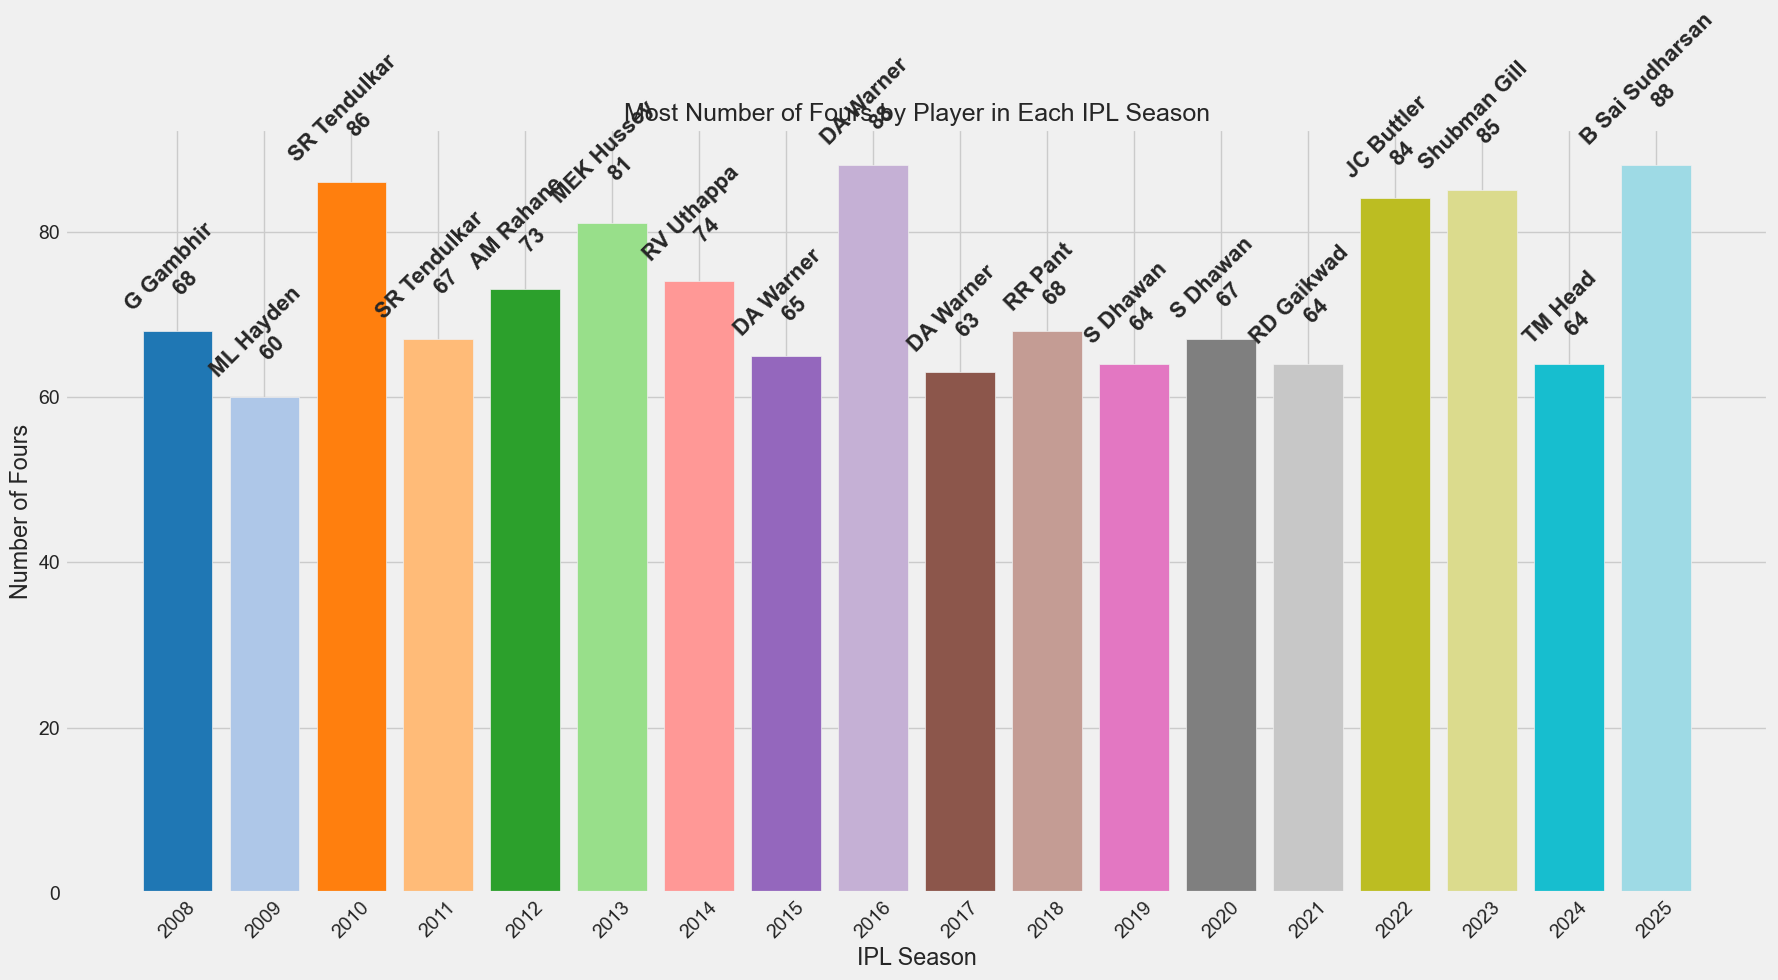

In [43]:
season_fours = (
    deliveries[deliveries["batter_runs"] == 4]
    .groupby(["season_id", "batter"])
    .size()
    .reset_index(name = "fours")
)

# Get top fours-hitter of each season
top_season_fours = season_fours.loc[
    season_fours.groupby("season_id")["fours"].idxmax()
].sort_values("season_id")

# Plot
plt.figure(figsize = (18,10))
colors = plt.cm.tab20(np.linspace(0, 1, len(top_season_fours)))

bars = plt.bar(
    top_season_fours["season_id"].astype(str),
    top_season_fours["fours"],
    color = colors
)

plt.title("Most Number of Fours by Player in Each IPL Season", fontsize = 18)
plt.xlabel("IPL Season")
plt.ylabel("Number of Fours")
plt.xticks(rotation = 45)

# Data labels
for bar, batter, fours in zip(
    bars,
    top_season_fours["batter"],
    top_season_fours["fours"]
):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f"{batter}\n{fours}",
        ha = "center",
        va = "bottom",
        fontsize = 16,
        fontweight = "bold",
        rotation = 45
    )

plt.tight_layout()
plt.show()

## No-Balls & Wide Balls in IPL History

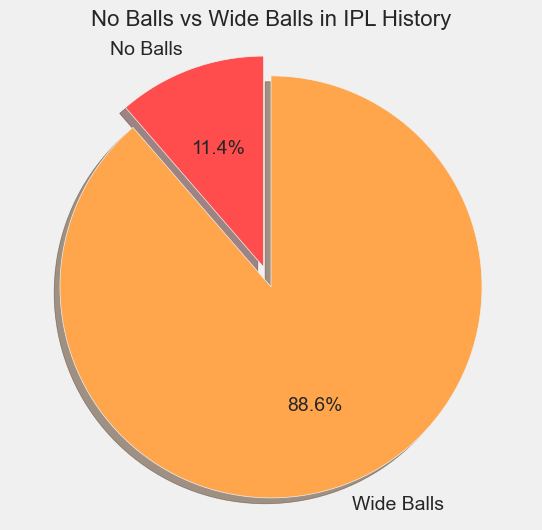

In [44]:
extras = deliveries[["is_no_ball", "is_wide_ball"]].sum()

# Colors for pie chart
colors = ["#ff4d4d", "#ffa64d"]

plt.figure(figsize = (6, 6))
plt.pie(
    extras.values,
    labels = ["No Balls", "Wide Balls"],
    colors = colors,
    autopct = "%1.1f%%",
    startangle = 90,
    explode = (0.05, 0.05),
    shadow = True
)

plt.title("No Balls vs Wide Balls in IPL History", fontsize = 16)
plt.axis("equal")  

plt.show()

## No Balls & Wide Balls Per IPL Season

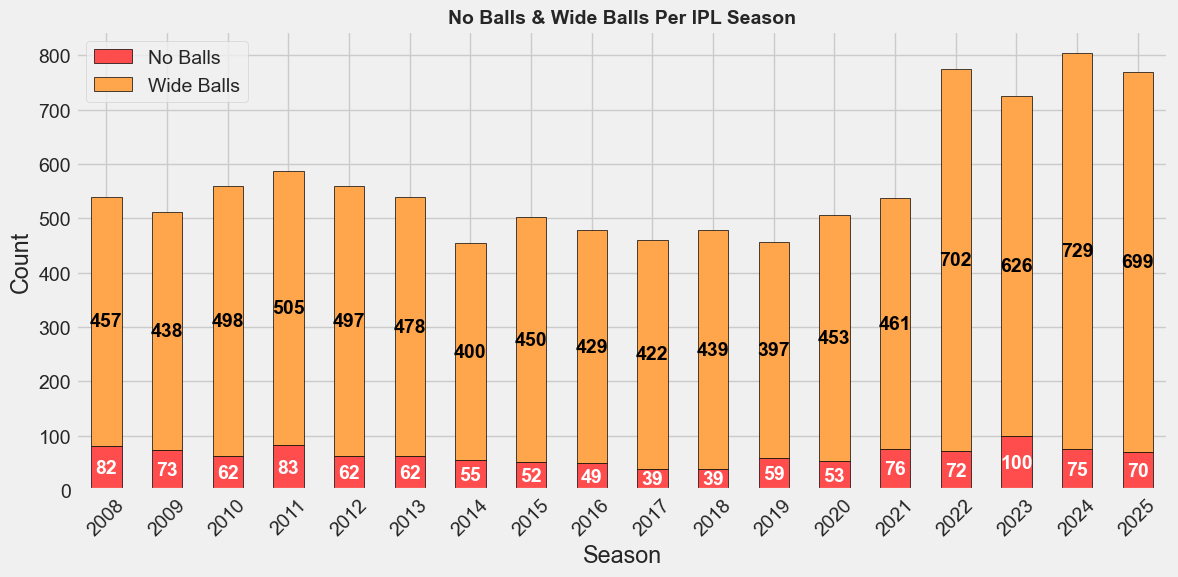

In [45]:
season_extras = deliveries.groupby("season_id")[["is_no_ball", "is_wide_ball"]].sum()

fig, ax = plt.subplots(figsize = (12, 6))

season_extras.plot(
    kind = "bar",
    stacked = True,
    ax = ax,
    color = ["#ff4d4d", "#ffa64d"],
    edgecolor = "black"
)

ax.set_title("No Balls & Wide Balls Per IPL Season", fontsize = 14, fontweight = "bold")
ax.set_xlabel("Season")
ax.set_ylabel("Count")
ax.legend(["No Balls", "Wide Balls"])

# Add data labels
for i, season in enumerate(season_extras.index):
    no_ball = season_extras.loc[season, "is_no_ball"]
    wide_ball = season_extras.loc[season, "is_wide_ball"]
    
    # No-ball label
    ax.text(
        i, no_ball / 2,
        int(no_ball),
        ha = "center", va = "center",
        fontsize = 14, color = "white", fontweight = "bold"
    )
    
    # Wide-ball label
    ax.text(
        i, no_ball + wide_ball / 2,
        int(wide_ball),
        ha = "center", va = "center",
        fontsize = 14, color = "black", fontweight = "bold"
    )

plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

## Total Sixes & Fours in IPL History

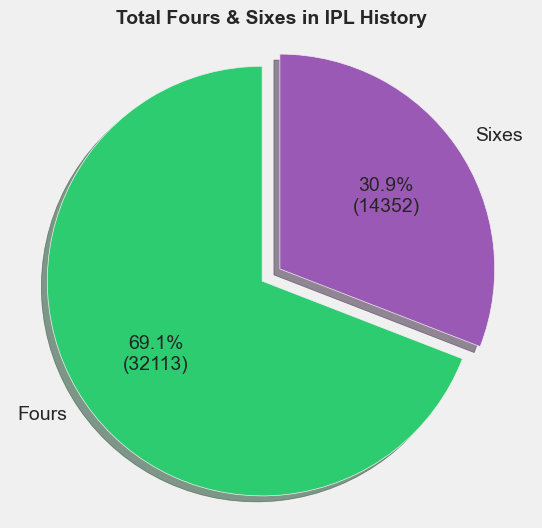

In [46]:
import matplotlib.pyplot as plt

# Totals
total_4 = (deliveries["batter_runs"] == 4).sum()
total_6 = (deliveries["batter_runs"] == 6).sum()

values = [total_4, total_6]
labels = ["Fours", "Sixes"]
colors = ["#2ecc71", "#9b59b6"]

plt.figure(figsize = (6, 6))
plt.pie(
    values,
    labels = labels,
    colors = colors,
    autopct = lambda p: f"{p:.1f}%\n({int(p*sum(values)/100)})",
    startangle = 90,
    explode = (0.05, 0.05),
    shadow = True
)

plt.title("Total Fours & Sixes in IPL History", fontsize = 14, fontweight = "bold")
plt.axis("equal")  # Perfect circle

plt.show()

## Most Title Wins by Teams in IPL History

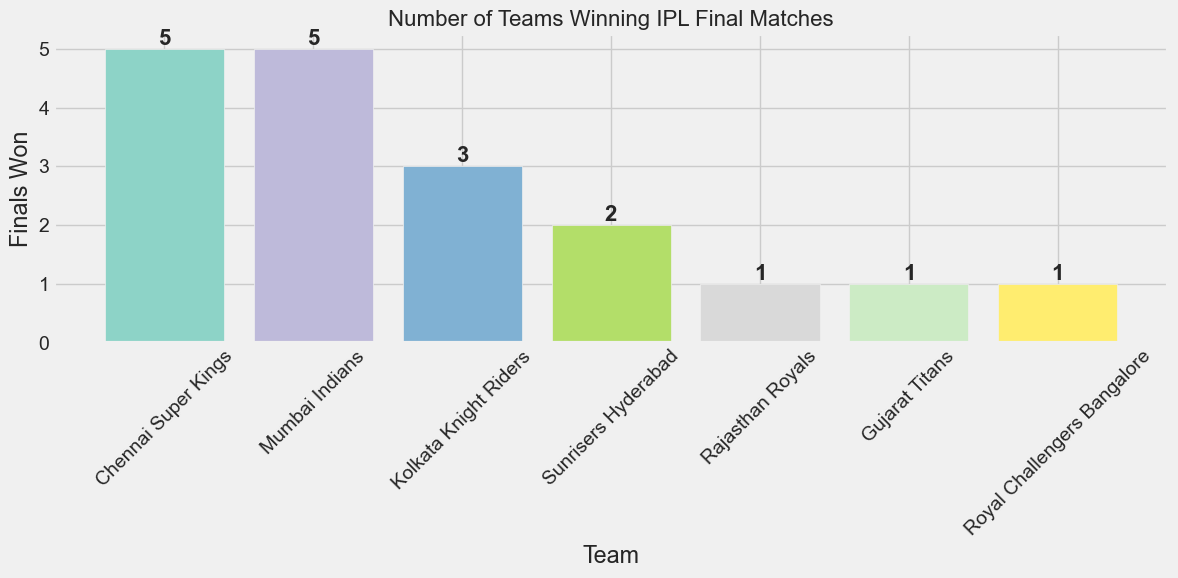

In [47]:
final_matches = matches[matches["stage"].str.contains("Final", case = False, na = False)]

# Count number of final wins by team
final_wins = final_matches["match_winner"].value_counts()

# Plot
plt.figure(figsize = (12,6))
colors = plt.cm.Set3(np.linspace(0, 1, len(final_wins)))

bars = plt.bar(final_wins.index, final_wins.values, color = colors)

plt.title("Number of Teams Winning IPL Final Matches", fontsize = 16)
plt.xlabel("Team")
plt.ylabel("Finals Won")
plt.xticks(rotation = 45)

# Data labels
for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        int(bar.get_height()),
        ha = "center",
        va = "bottom",
        fontsize = 16,
        fontweight = "bold"
    )

plt.tight_layout()
plt.show()

## Toss Decision vs Winning Percentage

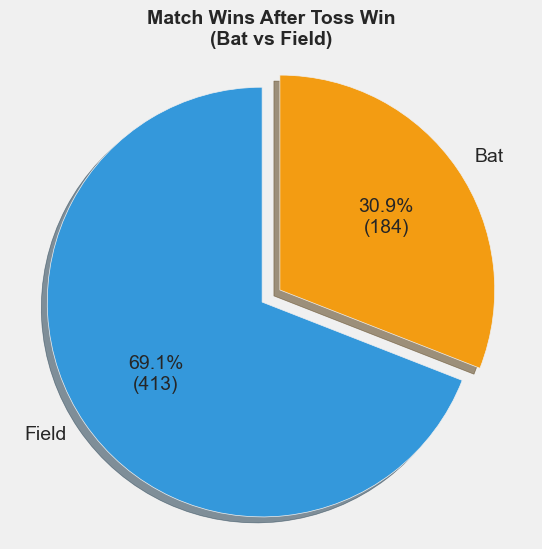

In [48]:
toss_win = matches[matches["toss_winner"] == matches["match_winner"]]

# Toss decision counts
decision_win = toss_win["toss_decision"].value_counts()

# Plot pie chart
plt.figure(figsize = (6, 6))
plt.pie(
    decision_win.values,
    labels = decision_win.index.str.title(),
    colors = ["#3498db", "#f39c12"],
    autopct = lambda p: f"{p:.1f}%\n({int(p*sum(decision_win.values) / 100)})",
    startangle = 90,
    explode = (0.05, 0.05),
    shadow = True
)

plt.title("Match Wins After Toss Win\n(Bat vs Field)", fontsize = 14, fontweight = "bold")
plt.axis("equal")  # Perfect circle

plt.show()

## Wins by Runs vs Wickets

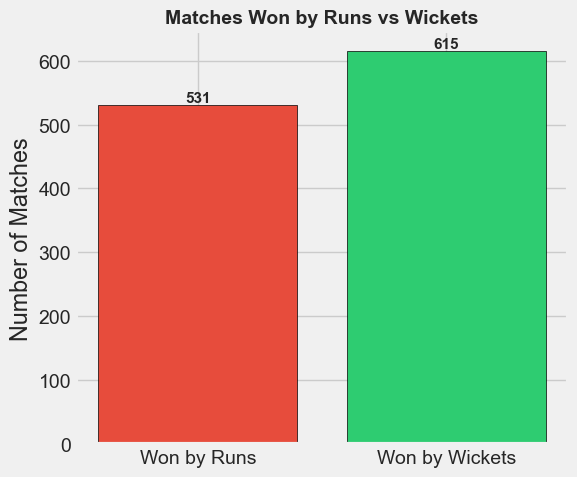

In [49]:
win_type = matches[["win_by_runs", "win_by_wickets"]].gt(0).sum()

# Plot
plt.figure(figsize = (6, 5))
bars = plt.bar(
    ["Won by Runs", "Won by Wickets"],
    win_type.values,
    color = ["#e74c3c", "#2ecc71"],
    edgecolor = "black"
)

# Title & labels
plt.title("Matches Won by Runs vs Wickets", fontsize = 14, fontweight = "bold")
plt.ylabel("Number of Matches")

# Add data labels
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        int(height),
        ha = "center",
        va = "bottom",
        fontsize = 11,
        fontweight = "bold"
    )

plt.tight_layout()
plt.show()

## Top 10 Best Strike Rates in IPL Hsitory (500+ Runs)

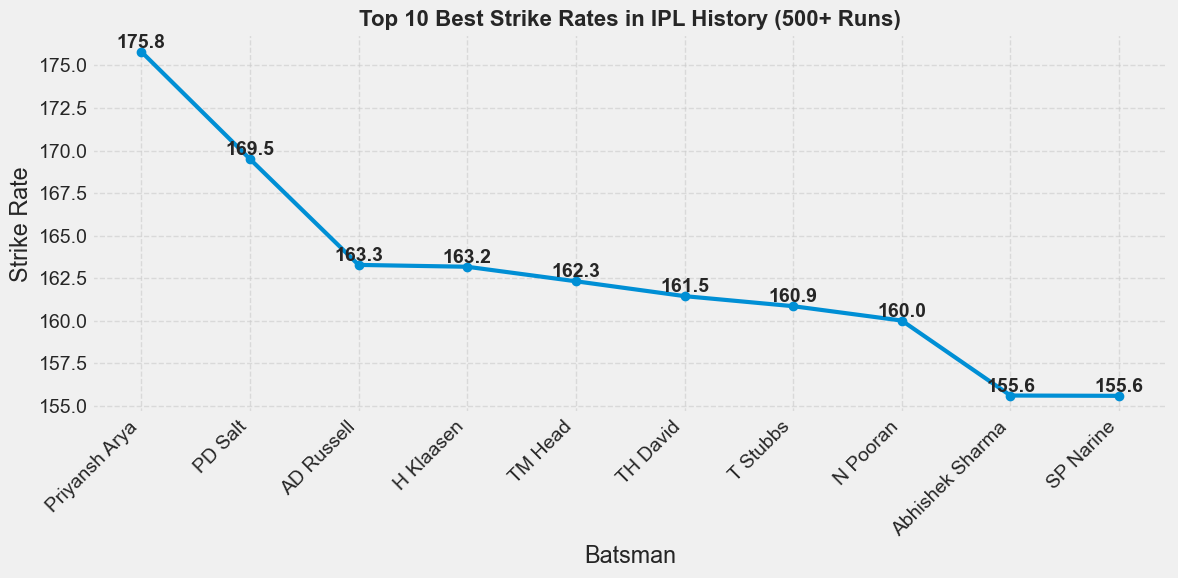

In [50]:
bat_stats = deliveries.groupby("batter").agg(
    runs = ("batter_runs", "sum"),
    balls = ("ball_number", "count")
)

# Strike rate
bat_stats["strike_rate"] = (bat_stats["runs"] / bat_stats["balls"]) * 100

# Top 10 strike rates (min 500 runs)
top_sr = (
    bat_stats[bat_stats["runs"] >= 500]
    .sort_values("strike_rate", ascending = False)
    .head(10)
)

# Plot line chart
plt.figure(figsize = (12, 6))
plt.plot(
    top_sr.index,
    top_sr["strike_rate"],
    marker = "o",
    linestyle = "-",
    linewidth = 3
)

# Titles & labels
plt.title(
    "Top 10 Best Strike Rates in IPL History (500+ Runs)",
    fontsize = 16,
    fontweight = "bold"
)
plt.xlabel("Batsman")
plt.ylabel("Strike Rate")
plt.xticks(rotation = 45, ha="right")

# Data labels
for i, value in enumerate(top_sr["strike_rate"]):
    plt.text(
        i,
        value,
        f"{value:.1f}",
        ha = "center",
        va = "bottom",
        fontsize = 14,
        fontweight = "bold"
    )

plt.grid(True, linestyle = "--", alpha = 0.6)
plt.tight_layout()
plt.show()

## Top 10 Best Batting Average in IPL Hsitory (500+ Runs)

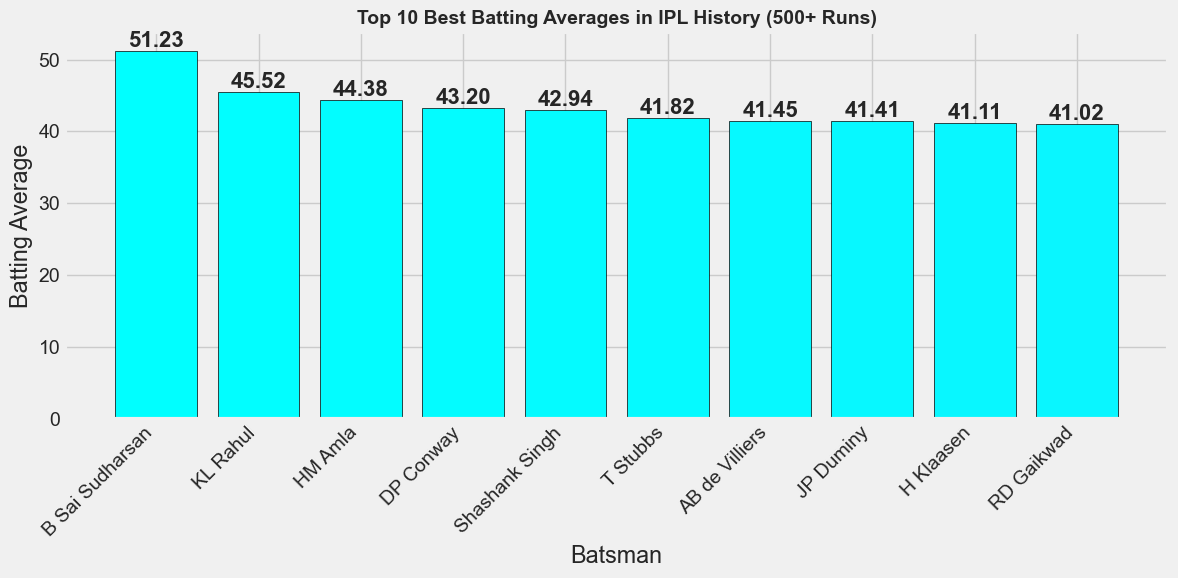

In [51]:
outs = deliveries[deliveries["is_wicket"] == 1].groupby("batter").size()

# Add outs to batting stats
bat_stats["outs"] = outs

# Avoid division by zero
bat_stats = bat_stats[bat_stats["outs"] > 0]

# Batting average
bat_stats["average"] = bat_stats["runs"] / bat_stats["outs"]

# Top 10 averages (min 500 runs)
top_avg = (
    bat_stats[bat_stats["runs"] >= 500]
    .sort_values("average", ascending = False)
    .head(10)
)

# Plot
plt.figure(figsize = (12, 6))
bars = plt.bar(
    top_avg.index,
    top_avg["average"],
    color = plt.cm.cool(range(len(top_avg))),
    edgecolor = "black"
)

# Titles & labels
plt.title("Top 10 Best Batting Averages in IPL History (500+ Runs)", fontsize = 14, fontweight = "bold")
plt.xlabel("Batsman")
plt.ylabel("Batting Average")
plt.xticks(rotation = 45, ha = "right")

# Data labels
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f"{height:.2f}",
        ha = "center",
        va = "bottom",
        fontsize = 16,
        fontweight = "bold"
    )

plt.tight_layout()
plt.show()

## Top 10 Best Economy Bowlers in IPL History (100+ Wickets)

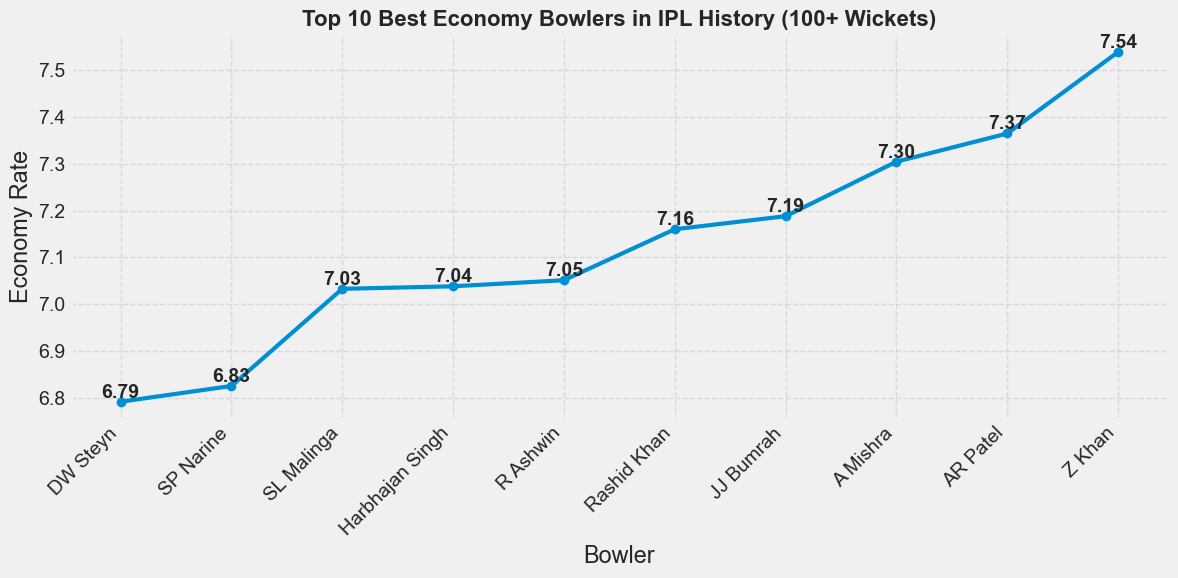

In [52]:
bowler_stats = deliveries.groupby("bowler").agg(
    runs = ("total_runs", "sum"),
    balls = ("ball_number", "count")
)

# Wickets per bowler
wickets = deliveries[deliveries["is_wicket"] == 1].groupby("bowler").size()
bowler_stats["wickets"] = wickets

# Remove bowlers with zero wickets
bowler_stats = bowler_stats[bowler_stats["wickets"] > 0]

# Economy rate
bowler_stats["economy"] = (bowler_stats["runs"] / bowler_stats["balls"]) * 6

# Top 10 best economy (min 100 wickets)
top_eco = (
    bowler_stats[bowler_stats["wickets"] >= 100]
    .sort_values("economy")
    .head(10)
)

# Plot line chart
plt.figure(figsize = (12, 6))
plt.plot(
    top_eco.index,
    top_eco["economy"],
    marker = "o",
    linestyle = "-",
    linewidth = 3
)

# Titles & labels
plt.title(
    "Top 10 Best Economy Bowlers in IPL History (100+ Wickets)",
    fontsize = 16,
    fontweight = "bold"
)
plt.xlabel("Bowler")
plt.ylabel("Economy Rate")
plt.xticks(rotation = 45, ha = "right")

# Data labels
for i, value in enumerate(top_eco["economy"]):
    plt.text(
        i,
        value,
        f"{value:.2f}",
        ha = "center",
        va = "bottom",
        fontsize = 14,
        fontweight = "bold"
    )

plt.grid(True, linestyle = "--", alpha = 0.6)
plt.tight_layout()
plt.show()

## Top 10 Cities by Number of Matches

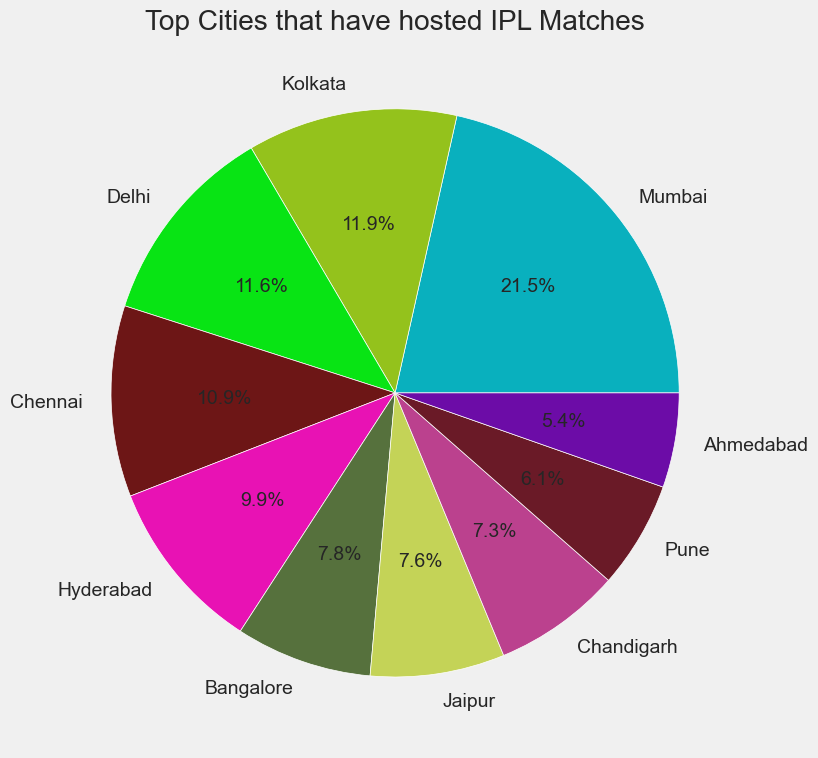

In [53]:
top_cities = matches['city'].value_counts().reset_index(name = 'Match Count')[:10]

plt.figure(figsize = (8,8))
plt.pie(top_cities['Match Count'], labels = top_cities['city'],colors = random_colors(10),
       autopct = '%1.1f%%', wedgeprops = dict(edgecolor = 'white'))
plt.title('Top Cities that have hosted IPL Matches')
plt.tight_layout()
plt.show()

## Top Dissimal Kinds

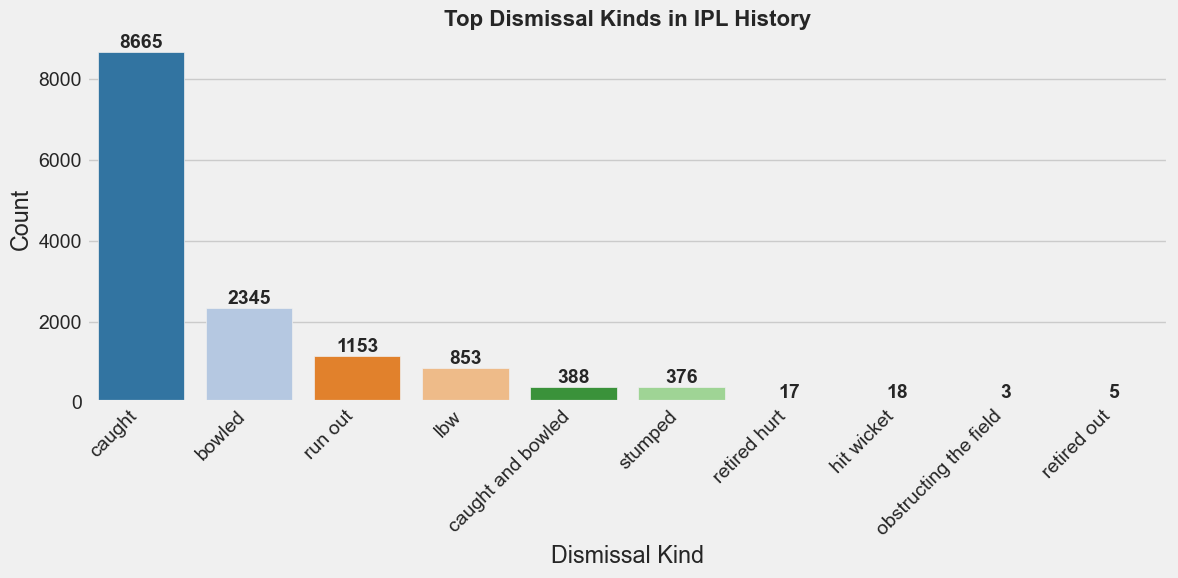

In [54]:
plt.figure(figsize = (12, 6))

ax = sns.countplot(
    x = "wicket_kind",
    data = deliveries,
    hue = "wicket_kind",              
    palette = "tab20",
    legend = False
)

# Titles & labels
plt.title("Top Dismissal Kinds in IPL History", fontsize = 16, fontweight = "bold")
plt.xlabel("Dismissal Kind")
plt.ylabel("Count")
plt.xticks(rotation = 45, ha = "right")

# ---- ADD DATA LABELS ----
for p in ax.patches:
    count = int(p.get_height())
    ax.text(
        p.get_x() + p.get_width() / 2,
        count,
        count,
        ha = "center",
        va = "bottom",
        fontsize = 14,
        fontweight = "bold"
    )

plt.tight_layout()
plt.show()

## Number of Super Overs in IPL History

In [55]:
super_over_balls = deliveries[deliveries["is_super_over"] == 1]

total_super_over_balls = super_over_balls.shape[0]

total_super_overs = total_super_over_balls // 12

print("Total Super Over Balls in IPl History:", total_super_over_balls)
print("Total Super Overs in IPl History", total_super_overs)

Total Super Over Balls in IPl History: 171
Total Super Overs in IPl History 14
